<a href="https://colab.research.google.com/github/flxmschneider/datascience/blob/master/spotify_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analysis of possible prediction / classification tasks
[Spotify Dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) 

In [12]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


# 1. Possibility: Regression task to predict popularity of a song


*   Predict "popularity" of songs (discrete numerical values between 0 and 100)
*   Use features like "energy" , "dancability" to create model
*   simple regression models and advanced models are possible
*   quality of possible models needs to be checked



Text(0.5, 1.0, 'Popularity mean=31.4 +/- 21.8')

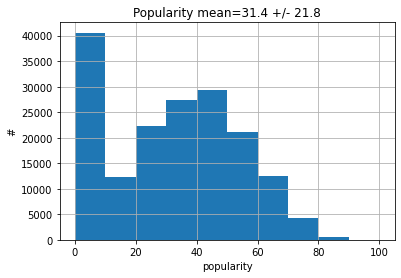

In [18]:
df['popularity'].hist()
plt.xlabel('popularity')
plt.ylabel("#")
plt.title(f'Popularity mean={round(np.mean(df.popularity),1)} +/- {round(np.std(df.popularity),1)}')

In [41]:
features = ['acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness',
       'liveness', 'loudness',
       'speechiness', 'tempo']

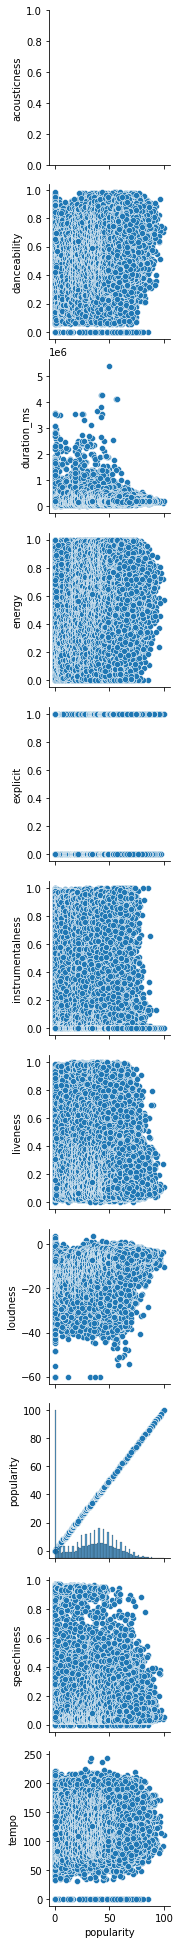

In [30]:
sns.pairplot(data=df, x_vars=['popularity'], y_vars=features)

In [24]:
df[features].corr().style.background_gradient()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


High correlation between:

popularity ~  energy / loudness

negative correlation between popularity and acousticness :D

strong positive correlation between popularity ~ year ...

## Simple Linear Regression

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['acousticness', 'danceability',
       'duration_ms', 'energy', 'explicit', 'instrumentalness',
       'liveness', 'loudness',
       'speechiness', 'tempo']
       
X_train, X_test, y_train, y_test = train_test_split(df[features], df.popularity, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print(mean_squared_error(prediction, y_test, squared=False))

16.597594387777917


## RandomForest Regression with GridSearch Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=0)

parameters= {'max_depth':[2,5,10,20,50],
"min_samples_split":[2,5,10,20],
"min_samples_leaf":[2,5,10,20],
}
cv = GridSearchCV(clf, parameters, cv=3)
cv.fit(X_train, y_train)

predictions = cv.best_estimator_.predict(X_test)
print(mean_squared_error(prediction, y_test, squared=False))

# 2. Possibility: Recomendation System

*  Build a recomendation system to propose "Songs you may like"

*  Cluster Songs based on features and find similar songs

*  different cluster methods possible... euclidean distance, PCA, K-Means, Gausian Mixtures, other distance metrics ...

*  dificult to evaluate

*  maybee optional exercise as bonus with more then usual hints